# Business Problem
A business manager of a consumer credit card bank is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off. They also want to predict customer churn from the dataset and gain some insights on how the bank can reduce the customers who have churned.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Dataset

In [ ]:
#import data 

import pandas as pd
bank = pd.read_csv('/content/drive/MyDrive/credit_card_churn.csv')

In [ ]:
bank.shape

(10127, 23)

# Data Cleaning

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# drop unneeded columns

bank = bank.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
                 ,"CLIENTNUM"],
                axis=1)

In [ ]:
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
#checking null values

bank.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
#check data duoplication
bank.duplicated().sum()
bank.drop_duplicates(inplace=True)
bank.shape

(10127, 20)

# Exploratory Data Analysis and Data Visualization

In [ ]:
bank.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Customer age distribution

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Credit Card Customer Age Distribution')

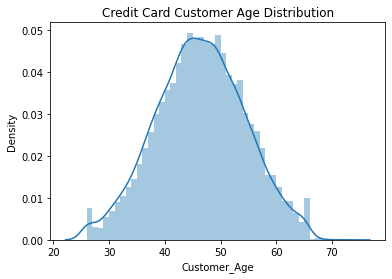

In [ ]:
sns.distplot(bank['Customer_Age'])
plt.title('Credit Card Customer Age Distribution')

* Customer age is normally distributed. 
* Most of the customer age are clustered around the mean value (between 40 to 60).

In [ ]:
bank["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


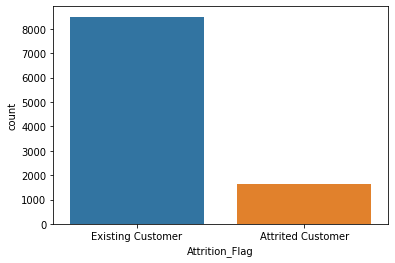

In [ ]:
# data is severly imbalanced so we will apply SMOTE to balance it

sns.countplot("Attrition_Flag",data=bank)

### Proportion of Gender

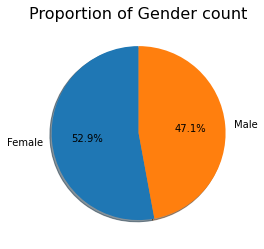

In [ ]:
plt.pie(bank['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Proportion of Gender count', fontsize = 16)
plt.show()

### Proportion of existing and attrited customers count

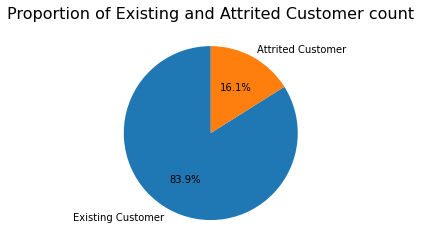

In [ ]:
plt.pie(bank['Attrition_Flag'].value_counts(), labels = ['Existing Customer', 'Attrited Customer'], 
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Existing and Attrited Customer count', fontsize = 16)
plt.show()

The comparison of customers who churn and do not have an unbalanced data distribution, where the ratio between interested customers and existing customers is around 84:16. This can affect model performance because the algorithm accepts disproportionately more samples from one class, causing it to be biased towards a particular class. so we need to apply some sampling technique to the dataset before training the model.

### Proportion of existing and attrited customer by gender

Text(0.5, 1.0, 'Existing and Attrted Customers by Gender')

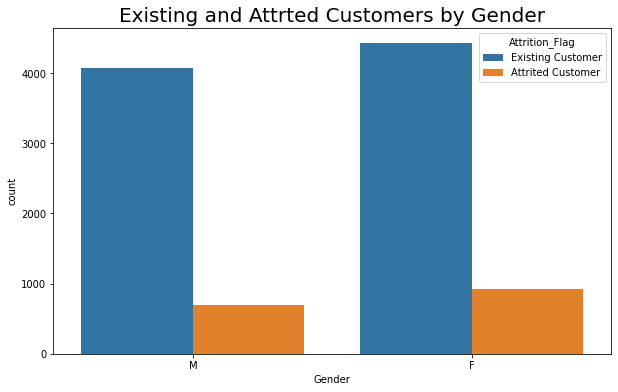

In [ ]:
#visualize to see the number of existing and attrited customers by gender
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Attrition_Flag', data=bank)
plt.title('Existing and Attrted Customers by Gender', fontsize=20)

Text(0.5, 1.0, 'Existing Customer vs Gender')

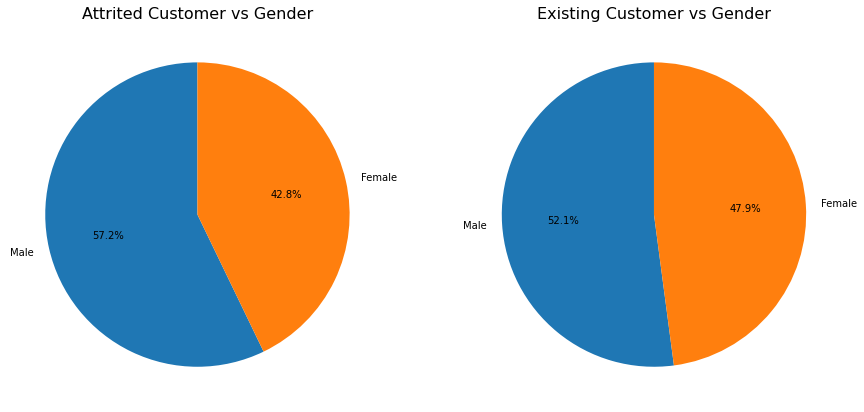

In [ ]:
# visualize to see the proportion of existing and attrited customers by gender

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_gender = bank.loc[bank["Attrition_Flag"] == "Attrited Customer", ["Gender"]].value_counts().tolist()
ax1.pie(x=attrited_gender, labels=["Male", "Female"], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Gender', fontsize=16)

existing_gender=bank.loc[bank["Attrition_Flag"] == "Existing Customer", ["Gender"]].value_counts().tolist()
ax2.pie(x=existing_gender,labels=["Male","Female"],autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Gender', fontsize=16)

1.   Attrited customers by gender have a difference of 14.4%.  
2.   Meanwhile, existing customers based on gender have a difference of 4.2%.
3.   It can be concluded that the attrition flag on gender is not very influential for future models.



### Proportion of entire education levels

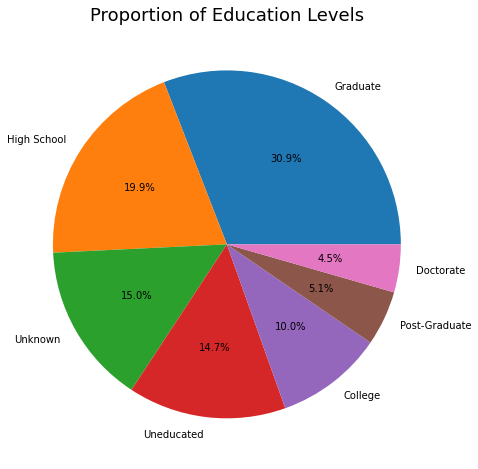

In [ ]:
edu = bank['Education_Level'].value_counts().to_frame('Counts') 
plt.figure(figsize = (8,8))
plt.pie(edu['Counts'], labels = edu.index, autopct = '%1.1f%%')
plt.title('Proportion of Education Levels', fontsize = 18)
plt.show()

Nearly 15% of the customer education level is unknown, which is a very large number. This can have a significant impact on the model to be trained. Since the dataset is quite large, it is a good idea to check whether or not deleting the row will have a significant effect on the model

### Proportion of education level by existing and attrited customer

Text(0.5, 1.0, 'Existing Customer vs Education Level')

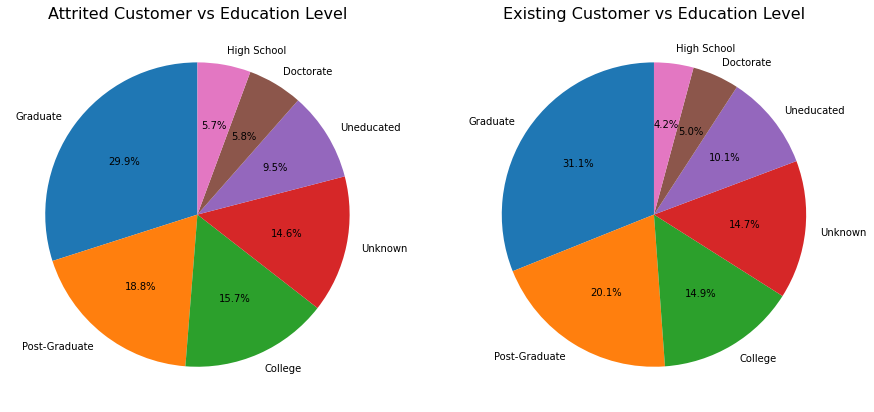

In [ ]:
# Proportion of education level by gender

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_edu = bank.loc[bank["Attrition_Flag"] == "Attrited Customer", ["Education_Level"]].value_counts().tolist()
ax1.pie(x=attrited_edu, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Education Level', fontsize=16)

existing_edu = bank.loc[bank["Attrition_Flag"] == "Existing Customer", ["Education_Level"]].value_counts().tolist()
ax2.pie(x=existing_edu, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Education Level', fontsize=16)


### Proportion of education level by gender

Text(0.5, 1.0, 'Male vs Education Level')

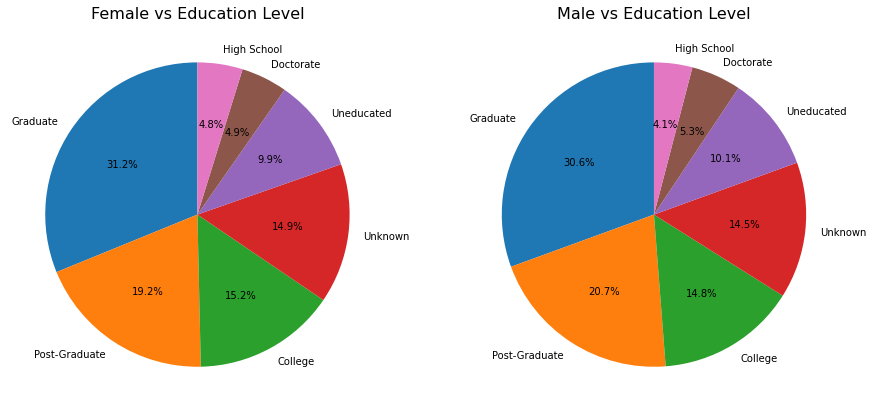

In [ ]:
# By pieplot

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_eduprop = bank.loc[bank["Gender"] == "F", ["Education_Level"]].value_counts().tolist()
ax1.pie(x=attrited_eduprop, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Female vs Education Level', fontsize=16)

existing_eduprop = bank.loc[bank["Gender"] == "M", ["Education_Level"]].value_counts().tolist()
ax2.pie(x=existing_eduprop, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Male vs Education Level', fontsize=16)



Text(0.5, 1.0, 'Education Level by gender')

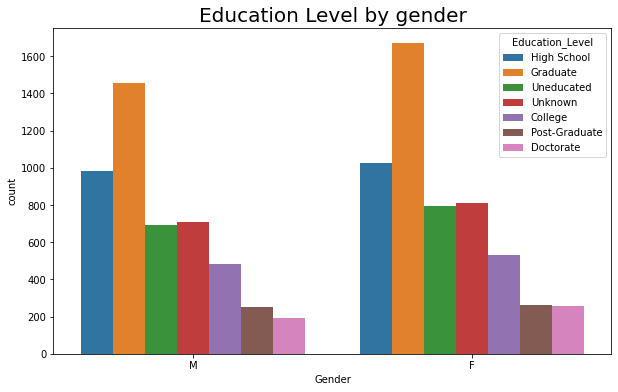

In [ ]:
# By countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Education_Level', data=bank)
plt.title('Education Level by gender', fontsize=20)

1.   Education level by gender have a difference of 14.4%.  
2.   Meanwhile, existing customers based on gender have a difference of 4.2%.
3.   It can be concluded that the attrition flag on gender is not very influential for future models.

### Proportion of marital status by attrited and existing customers 

In [ ]:
bank['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Existing Customer vs Marital_Status')

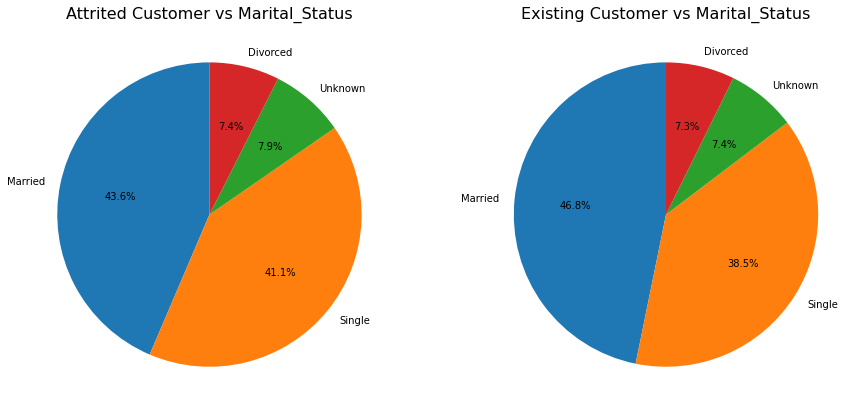

In [ ]:
# Proportion of marital status by customer

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_mar = bank.loc[bank["Attrition_Flag"] == "Attrited Customer", ["Marital_Status"]].value_counts().tolist()
ax1.pie(x=attrited_mar, labels=['Married', 'Single', 'Unknown', 'Divorced'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Marital_Status', fontsize=16)

existing_mar = bank.loc[bank["Attrition_Flag"] == "Existing Customer", ["Marital_Status"]].value_counts().tolist()
ax2.pie(x=existing_mar, labels=['Married', 'Single', 'Unknown', 'Divorced'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Marital_Status', fontsize=16)


Text(0.5, 1.0, 'Attrited and Existing Customers by Marital Status')

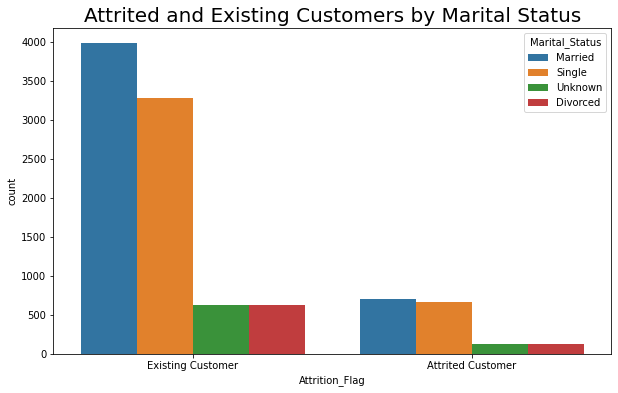

In [ ]:
# By countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition_Flag', hue='Marital_Status', data=bank)
plt.title('Attrited and Existing Customers by Marital Status', fontsize=20)


Education level by gender with the highest number in the graduate category. But there's not much difference between female and male, so this doesn't really have much effect either.

### Proportion of income category by customer

Text(0.5, 1.0, 'Existing Customer vs Income_Category')

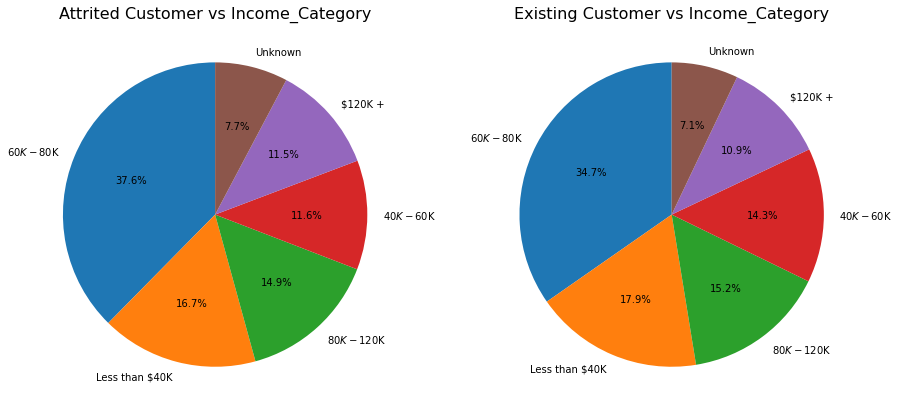

In [ ]:
# Proportion of income category by customer

import collections
from collections import Counter

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
count = Counter(bank['Income_Category'])

attrited_inc = bank.loc[bank["Attrition_Flag"] == "Attrited Customer", ["Income_Category"]].value_counts().tolist()
ax1.pie(x=attrited_inc, labels=count, autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Income_Category', fontsize=16)

existing_inc = bank.loc[bank["Attrition_Flag"] == "Existing Customer", ["Income_Category"]].value_counts().tolist()
ax2.pie(x=existing_inc, labels=count, autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Income_Category', fontsize=16)


The proportion of both attrited customer and existing customer by income category is highly concentrated around 60-80K.

In [ ]:
#exploring Income category column

bank["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


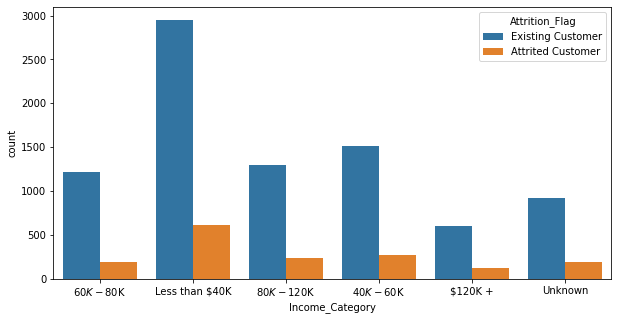

In [ ]:
#EDA for Income category

plt.figure(figsize=(10,5))
sns.countplot("Income_Category",hue="Attrition_Flag",data=bank)

In [ ]:
#replace Attrition_Flag to numerical values

bank["Attrition_Flag"].replace(to_replace = ["Existing Customer","Attrited Customer"],value=[1,0],inplace=True)

In [ ]:
bank["Attrition_Flag"].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
bank.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
# onehot encoding for categorical columns

bank = pd.get_dummies(data=bank,columns=["Gender","Education_Level","Marital_Status","Income_Category",
                                         "Card_Category"]
                      ,drop_first=True)

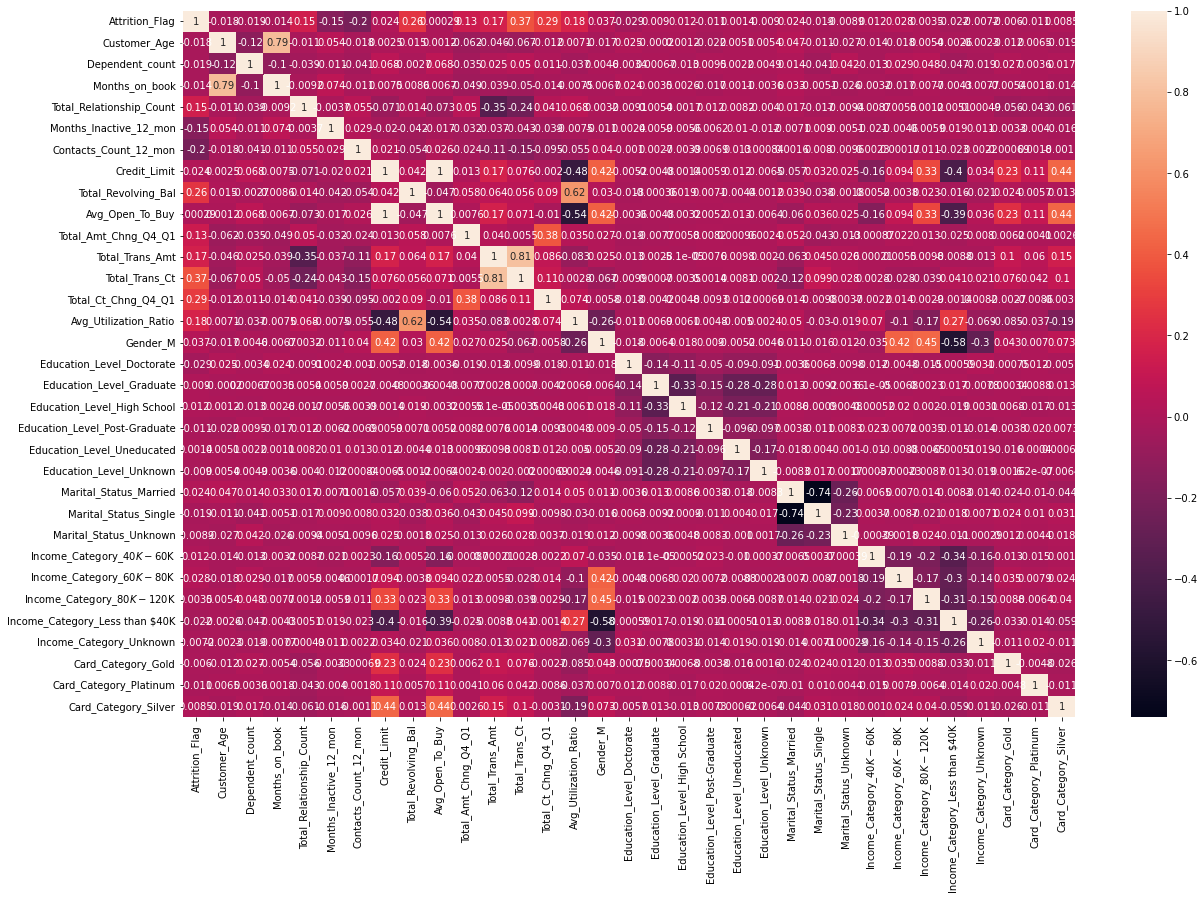

In [ ]:
#heatmap for correlation 

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (20,13))

sns.heatmap(bank.corr(),annot = True)

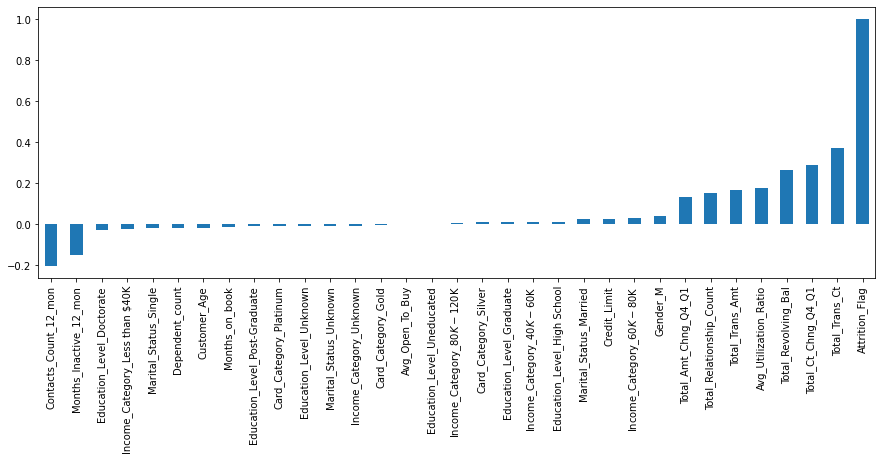

In [ ]:
#checking correlation of attrition_flag with other fields
plt.figure(figsize=(15,5))
bank.corr()["Attrition_Flag"].sort_values().plot(kind="bar")

In [ ]:
# divide into features and labels

X = bank.drop("Attrition_Flag",axis=1)

In [ ]:
X.shape

(10127, 32)

In [ ]:
y= bank["Attrition_Flag"]

In [ ]:
y.shape

(10127,)

# Customer Churn Prediction

In [ ]:
# do train test split for features and labels

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
# checking training sample numbers for Label ( attrition flag)
from collections import Counter
print(Counter(y_train))

Counter({1: 5963, 0: 1125})


In [ ]:
# perform Standard Scaling and SMOTE to handle imbalance between data 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)

In [ ]:
# checking training sample numbers for Label ( attrition flag) after SMOTE ( they are equal )


from collections import Counter
print(Counter(y_train))

Counter({1: 5963, 0: 5963})


In [ ]:
#Try building model with XGBoost
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [ ]:
#Predicting the test set

y_pred = xgb.predict(X_test)

In [ ]:
# Making the confusion matrix and calculating accuracy score
from sklearn.metrics import classification_report , accuracy_score, roc_auc_score
from sklearn import metrics

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

print(roc_auc_score(y_test, y_pred))



0.9624876604146101
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       502
           1       0.99      0.97      0.98      2537

    accuracy                           0.96      3039
   macro avg       0.92      0.95      0.93      3039
weighted avg       0.96      0.96      0.96      3039

0.947972006338069


In [ ]:
#Try building model with Random Forest
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,y_train)


#model.feature_importances_

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       502
           1       0.98      0.97      0.98      2537

    accuracy                           0.96      3039
   macro avg       0.92      0.93      0.93      3039
weighted avg       0.96      0.96      0.96      3039



In [ ]:
print(roc_auc_score(y_test, y_pred))

0.9302196024730405


In [ ]:
# trying Support Vector Machines

from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 420   82]
 [ 183 2354]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       502
           1       0.97      0.93      0.95      2537

    accuracy                           0.91      3039
   macro avg       0.83      0.88      0.85      3039
weighted avg       0.92      0.91      0.92      3039



In [ ]:
print(roc_auc_score(y_test, y_pred))

0.882260473282275


**Conclusion**

1.There are 16.07% of customers who have churned.

2.The proportion of gender count is almost equally distributed (52.9% male and 47.1%) compare to proportion of existing and attrited customer count (83.9% and 16.1%) which is highly imbalanced.

3.The proportion of attrited customers by gender there are 14.4% more male than female who have churned.

4.Customers who have churned are highly educated - A high proportion of education level of attrited customer is Graduate level (29.9%), followed by Post-Graduate level (18.8%).

5.A high proportion of marital status of customers who have churned is Married (43.6%), followed by Single (41.1%) compared to Divorced (7.4%) and Unknown (7.9%) status - Marital stuats of the attributed customers are highly clustered in Married status and Single.

6.The above plot shows the percentage of attrite customers of the different categories in a categorical variable. According to the plot, females are more likely than males to cancel their credit card services, and as an obvious fact, consumers with annual incomes of less than $40k are more likely to cancel their credit card services. Surprisingly, platinum cardholders have a much higher likelihood of abandoning their credit card service than other card holders. The highest proportion of attrited customers under educational level belongs to Doctorate level.

*   Try building model with XGBoost accuracy 0.96 (96%)
*   Try building model with Random Forest accuracy 0.96 (96%)
*   Trying Support Vector Machines accuracy 0.91 (91%)


After several experiments, we can learn that RandomForest may be the best performing model for this data set. Because precision and recall for this model much better than XGBoost.



### Model Tuning

In [ ]:
#perform grid Search CV to find best hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param = {"n_estimators": [10,50,100,200],"max_features" : ["auto", "sqrt", "log2"],
         "criterion" : ["gini", "entropy"]}

In [ ]:
# add estimator and perform grid search CV

grid = GridSearchCV(RandomForestClassifier(),param_grid=param,verbose=2)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.2s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.2s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.2s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.2s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.2s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.9s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.8s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.9s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.9s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.9s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   1.8s
[CV] END criterion=gini, max_features=auto, n_e

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,grid_pred)) # c00: TN, , c01:FP, c10: FN, c11: TP  
print(classification_report(y_test,grid_pred))

[[ 450   52]
 [  67 2470]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       502
           1       0.98      0.97      0.98      2537

    accuracy                           0.96      3039
   macro avg       0.92      0.94      0.93      3039
weighted avg       0.96      0.96      0.96      3039



In [ ]:
cm = confusion_matrix(y_test,grid_pred)